# 长期增长

## 概述

在本讲座中，我们将使用Python、{doc}`pandas<pyprog:pandas>` 和 {doc}`Matplotlib<pyprog:matplotlib>` 来下载、处理和可视化经济增长的历史数据。

除了学习如何运用这些工具之外，我们还将使用它们来描述跨越多个世纪的多个国家的经济增长经历。

这些 “增长事实 ”之所以有趣，原因是多方面的。 

首先解释增长事实是 “发展经济学 ”和 “经济史 ”的主要目的。

其次增长事实也是历史学家研究地缘政治力量和动态的重要依据。

因此，亚当-托兹在阐述第一次世界大战的地缘政治先例和前因后果时，首先描述了欧洲大国的国内生产总值（GDP）在 1914 年之前的 70 年间是如何演变的（见 {cite}`Tooze_2014` 第 1 章）。

使用与 Tooze 构建图表时相同的数据（时间线稍长），下面是我们对他的第 1 章图表的解读。

```{figure} _static/lecture_specific/long_run_growth/tooze_ch1_graph.png
:width: 100%
```

（这只是我们的图 {numref}`gdp1` 的副本。 我们将在本讲座的稍后部分介绍如何绘制该图）。

{cite}`Tooze_2014`的第1章用他的图表说明了美国的GDP在19世纪初如何远远落后于大英帝国的GDP。

到 19 世纪末，美国的 GDP 已赶上大英帝国的 GDP，而在 20 世纪上半叶，
美国的国内生产总值超过了大英帝国。

在亚当-图兹看来，这一事实是 “美国世纪 ”的关键地缘政治基础。

看了这张图，再看看它是如何为 “美国的20世纪”搭建地缘政治舞台的，自然而然地 
诱使人们想要一个与他的图表相对应的 2014 年或以后的图表。

(感兴趣的读者若想找到答案的提示，现在不妨跳到前面看看图{numref}`gdp2`）。

正如我们将看到的，通过类比推理，这张图表或许奠定了“XXX国的21世纪”的基础，你可以自由猜测国家XXX。

在我们收集数据以构建这两个图表的过程中，我们还将研究多国在尽可能长的时间范围内的增长经历。

这些图表将描绘“工业革命”如何在18世纪末始于英国，然后传播到一个国家又一个国家。

简而言之，本讲记录了各个国家在很长一段时间内的增长轨迹。

一些国家经历了持续百年的长期快速增长，而另一些国家则没有。

由于各国的人口数量不同，而且一个国家内部的人口数量也会随着时间的推移而变化。
因此，描述一个国家的 GDP 总量和人均 GDP 的变化是非常有趣的。

首先，让我们导入所需的库。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from collections import namedtuple

## 准备数据

由[安格斯-麦迪逊（Angus Maddison）](https://en.wikipedia.org/wiki/Angus_Maddison)发起的一个项目收集了许多与经济增长相关的历史时间序列、
有些可以追溯到第一个世纪。

可以从[Maddison Historical Statistics](https://www.rug.nl/ggdc/historicaldevelopment/maddison/)下载数据，点击“Latest Maddison Project Release”即可获取。

我们将从 QuantEcon GitHub 存储库中读取数据。

本节的目的是生成一个方便的 `DataFrame` 实例，其中包含不同国家的人均 GDP。

在这里，我们将 Maddison 的数据读入一个 pandas `DataFrame`：

In [2]:
data_url = "https://github.com/QuantEcon/lecture-python-intro/raw/main/lectures/datasets/mpd2020.xlsx"
data = pd.read_excel(data_url, 
                     sheet_name='Full data')
data.head()

,countrycode,country,year,gdppc,pop
0,AFG,Afghanistan,1820,NaN,3280.0
1,AFG,Afghanistan,1870,NaN,4207.0
2,AFG,Afghanistan,1913,NaN,5730.0
3,AFG,Afghanistan,1950,1156.0,8150.0
4,AFG,Afghanistan,1951,1170.0,8284.0


我们可以看到，该数据集包含许多国家和年份的人均国内生产总值（`gdppc`）和人口（`pop`）。

让我们看看这个数据集中有多少国家和哪些国家

In [3]:
countries = data.country.unique()
len(countries)

169

通过运行上面的代码，我们可以找到有多少个国家的数据。

下面，我们将列出这些国家。

In [4]:
countries

array(['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bosnia and Herzegovina', 'Belarus',
       'Bolivia (Plurinational State of)', 'Brazil', 'Barbados',
       'Botswana', 'Central African Republic', 'Canada', 'Switzerland',
       'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'D.R. of the Congo',
       'Congo', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Czechoslovakia', 'Cuba', 'Cyprus', 'Czech Republic', 'Germany',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Spain', 'Estonia', 'Ethiopia', 'Finland',
       'France', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea',
       'Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece',
       'Guatemala', 'China, Hong Kong SAR', 'Honduras', 'Croatia',
       'Haiti', 'Hungary', 

我们现在可以探索一些可用的169个国家。

让我们遍历每个国家，以了解每个国家可用的年份。

In [5]:
country_years = []
for country in countries:
    cy_data = data[data.country == country]['year']
    ymin, ymax = cy_data.min(), cy_data.max()
    country_years.append((country, ymin, ymax))
country_years = pd.DataFrame(country_years,
                    columns=['country', 'min_year', 'max_year']).set_index('country')
country_years.head()

,min_year,max_year
country,,
Afghanistan,1820,2018
Angola,1950,2018
Albania,1,2018
United Arab Emirates,1950,2018
Argentina,1800,2018


现在，让我们将原始数据重塑为一些方便的变量，以便更快地访问各国的时间序列数据。

我们可以在该数据集中的国家代码（`countrycode`）和国家名称（`country`）之间建立一个有用的映射关系

In [6]:
code_to_name = data[
    ['countrycode', 'country']].drop_duplicates().reset_index(drop=True).set_index(['countrycode'])

现在，我们调用人均 GDP (`gdppc`)，并生成一个宽格式的数据

In [7]:
gdp_pc = data.set_index(['countrycode', 'year'])['gdppc']
gdp_pc = gdp_pc.unstack('countrycode')

In [8]:
gdp_pc.tail()

countrycode,AFG,AGO,ALB,ARE,ARG,ARM,AUS,AUT,AZE,BDI,...,URY,USA,UZB,VEN,VNM,YEM,YUG,ZAF,ZMB,ZWE
year,,,,,,,,,,,,,,,,,,,,,
2014,2022.0000,8673.0000,9808.0000,72601.0000,19183.0000,9735.0000,47867.0000,41338.0000,17439.0000,748.0000,...,19160.0000,51664.0000,9085.0000,20317.0000,5455.0000,4054.0000,14627.0000,12242.0000,3478.0000,1594.0000
2015,1928.0000,8689.0000,10032.0000,74746.0000,19502.0000,10042.0000,48357.0000,41294.0000,17460.0000,694.0000,...,19244.0000,52591.0000,9720.0000,18802.0000,5763.0000,2844.0000,14971.0000,12246.0000,3478.0000,1560.0000
2016,1929.0000,8453.0000,10342.0000,75876.0000,18875.0000,10080.0000,48845.0000,41445.0000,16645.0000,665.0000,...,19468.0000,53015.0000,10381.0000,15219.0000,6062.0000,2506.0000,15416.0000,12139.0000,3479.0000,1534.0000
2017,2014.7453,8146.4354,10702.1201,76643.4984,19200.9061,10859.3783,49265.6135,42177.3706,16522.3072,671.3169,...,19918.1361,54007.7698,10743.8666,12879.1350,6422.0865,2321.9239,15960.8432,12189.3579,3497.5818,1582.3662
2018,1934.5550,7771.4418,11104.1665,76397.8181,18556.3831,11454.4251,49830.7993,42988.0709,16628.0553,651.3589,...,20185.8360,55334.7394,11220.3702,10709.9506,6814.1423,2284.8899,16558.3123,12165.7948,3534.0337,1611.4052


我们创建了一个变量 `color_mapping` 来存储国家代码和颜色之间的映射，以保证接下来线条的颜色一致

In [9]:
country_names = data['countrycode']

# 生成一个颜色图，颜色数量与国家数量相匹配
colors = cm.tab20(np.linspace(0, 0.95, len(country_names)))

# 创建一个字典，将每个国家映射成相应的颜色
color_mapping = {country: color for 
                 country, color in zip(country_names, colors)}

## 人均国内生产总值

在本节中，我们将研究几个不同国家的长期人均国内生产总值。

### 英国

首先我们研究英国的 GDP 增长情况

现在我们可以提取并绘制这些国家的 GDP 数据。

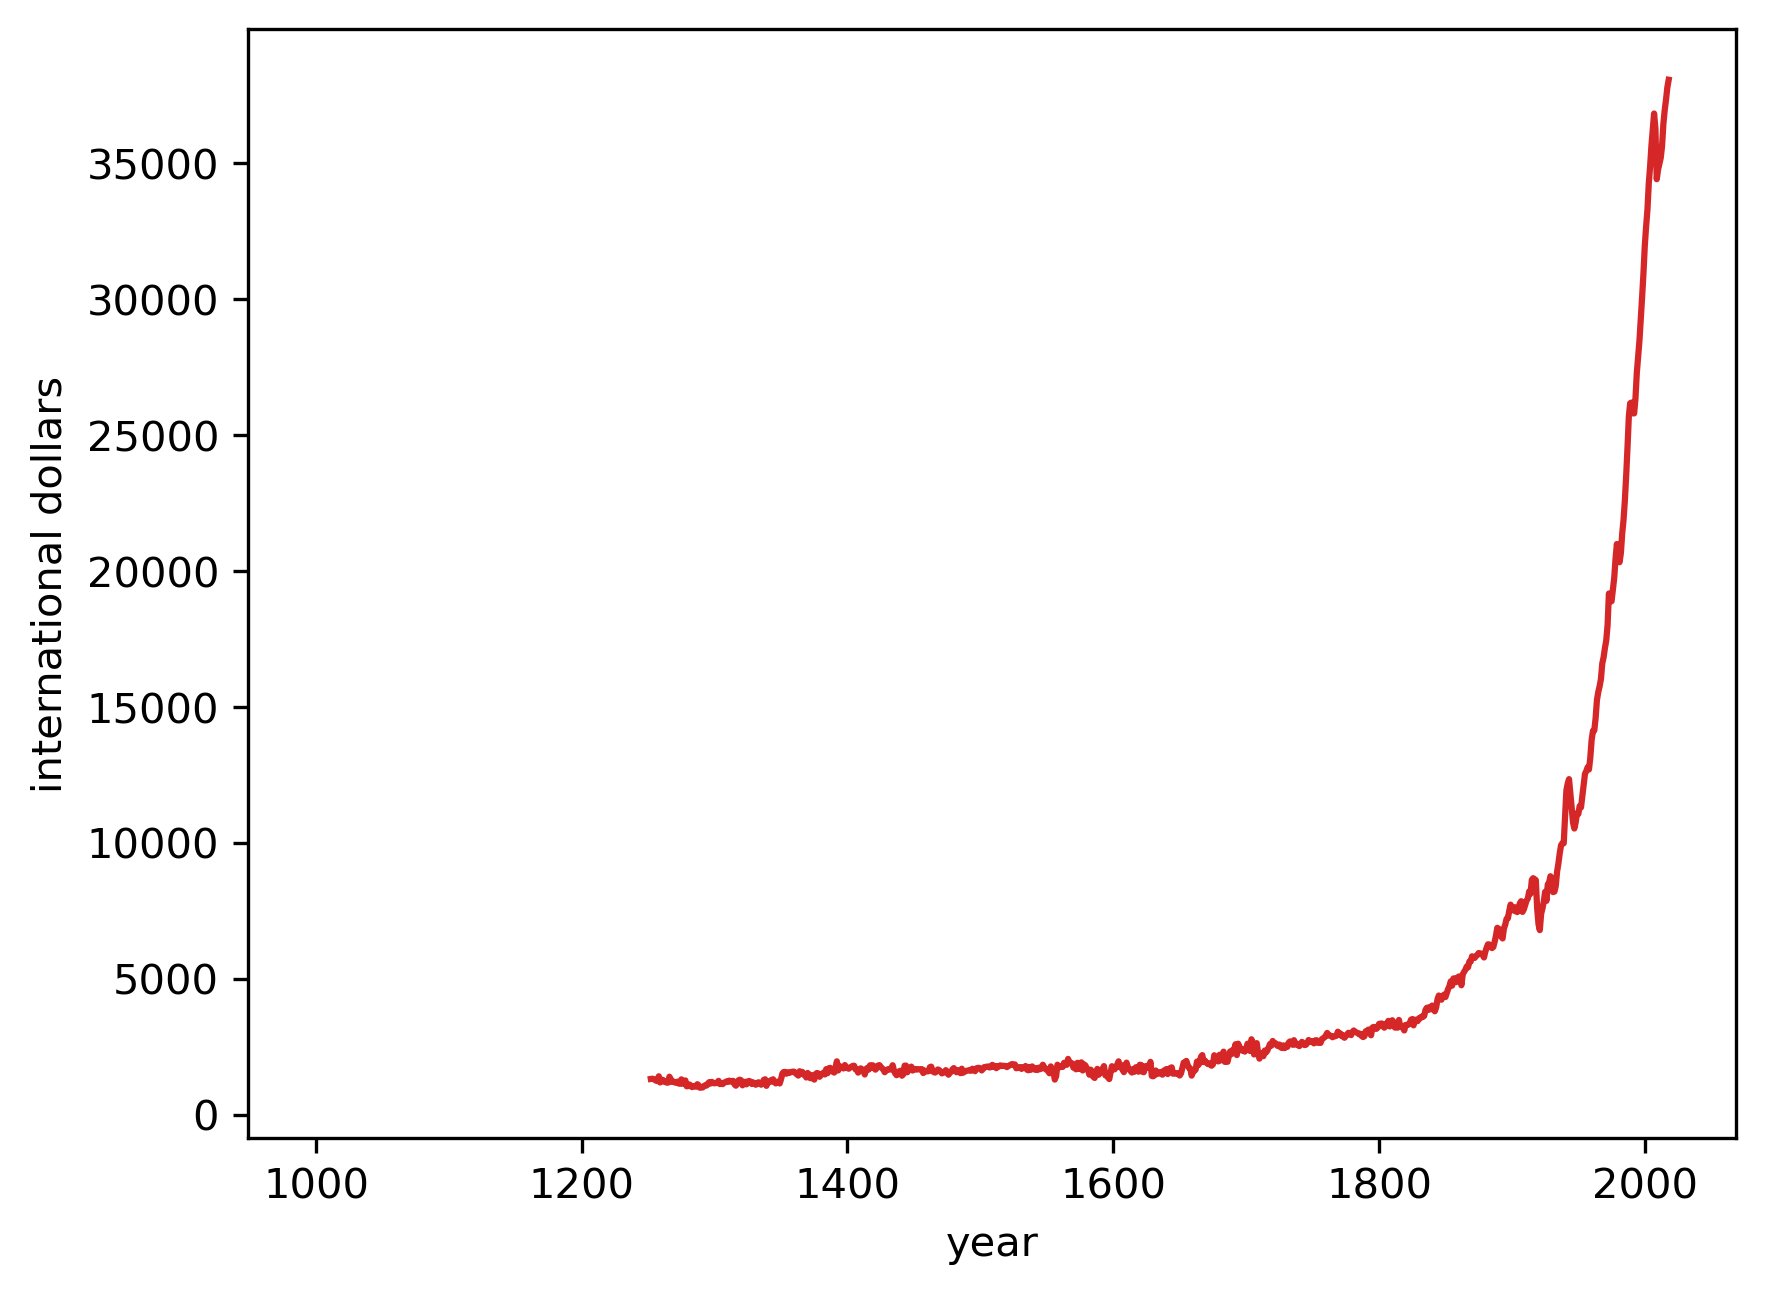

In [10]:
fig, ax = plt.subplots(dpi=300)
country = 'GBR'
gdp_pc[country].plot(
        ax=ax,
        ylabel='international dollars',
        xlabel='year',
        color=color_mapping[country]
    );

:::{note}
[国际美元](https://en.wikipedia.org/wiki/international_dollar) 是一种假设的货币单位，在特定时间点与美元在美国的购买力平价相同。它们也被称为 Geary-Khamis 美元（GK 美元）。
:::

我们可以看到，在本千年早期的 250 年中，较长时期的数据是不连续的，因此我们可以选择内插法得到连续的线图。

在这里，我们用虚线表示插值趋势

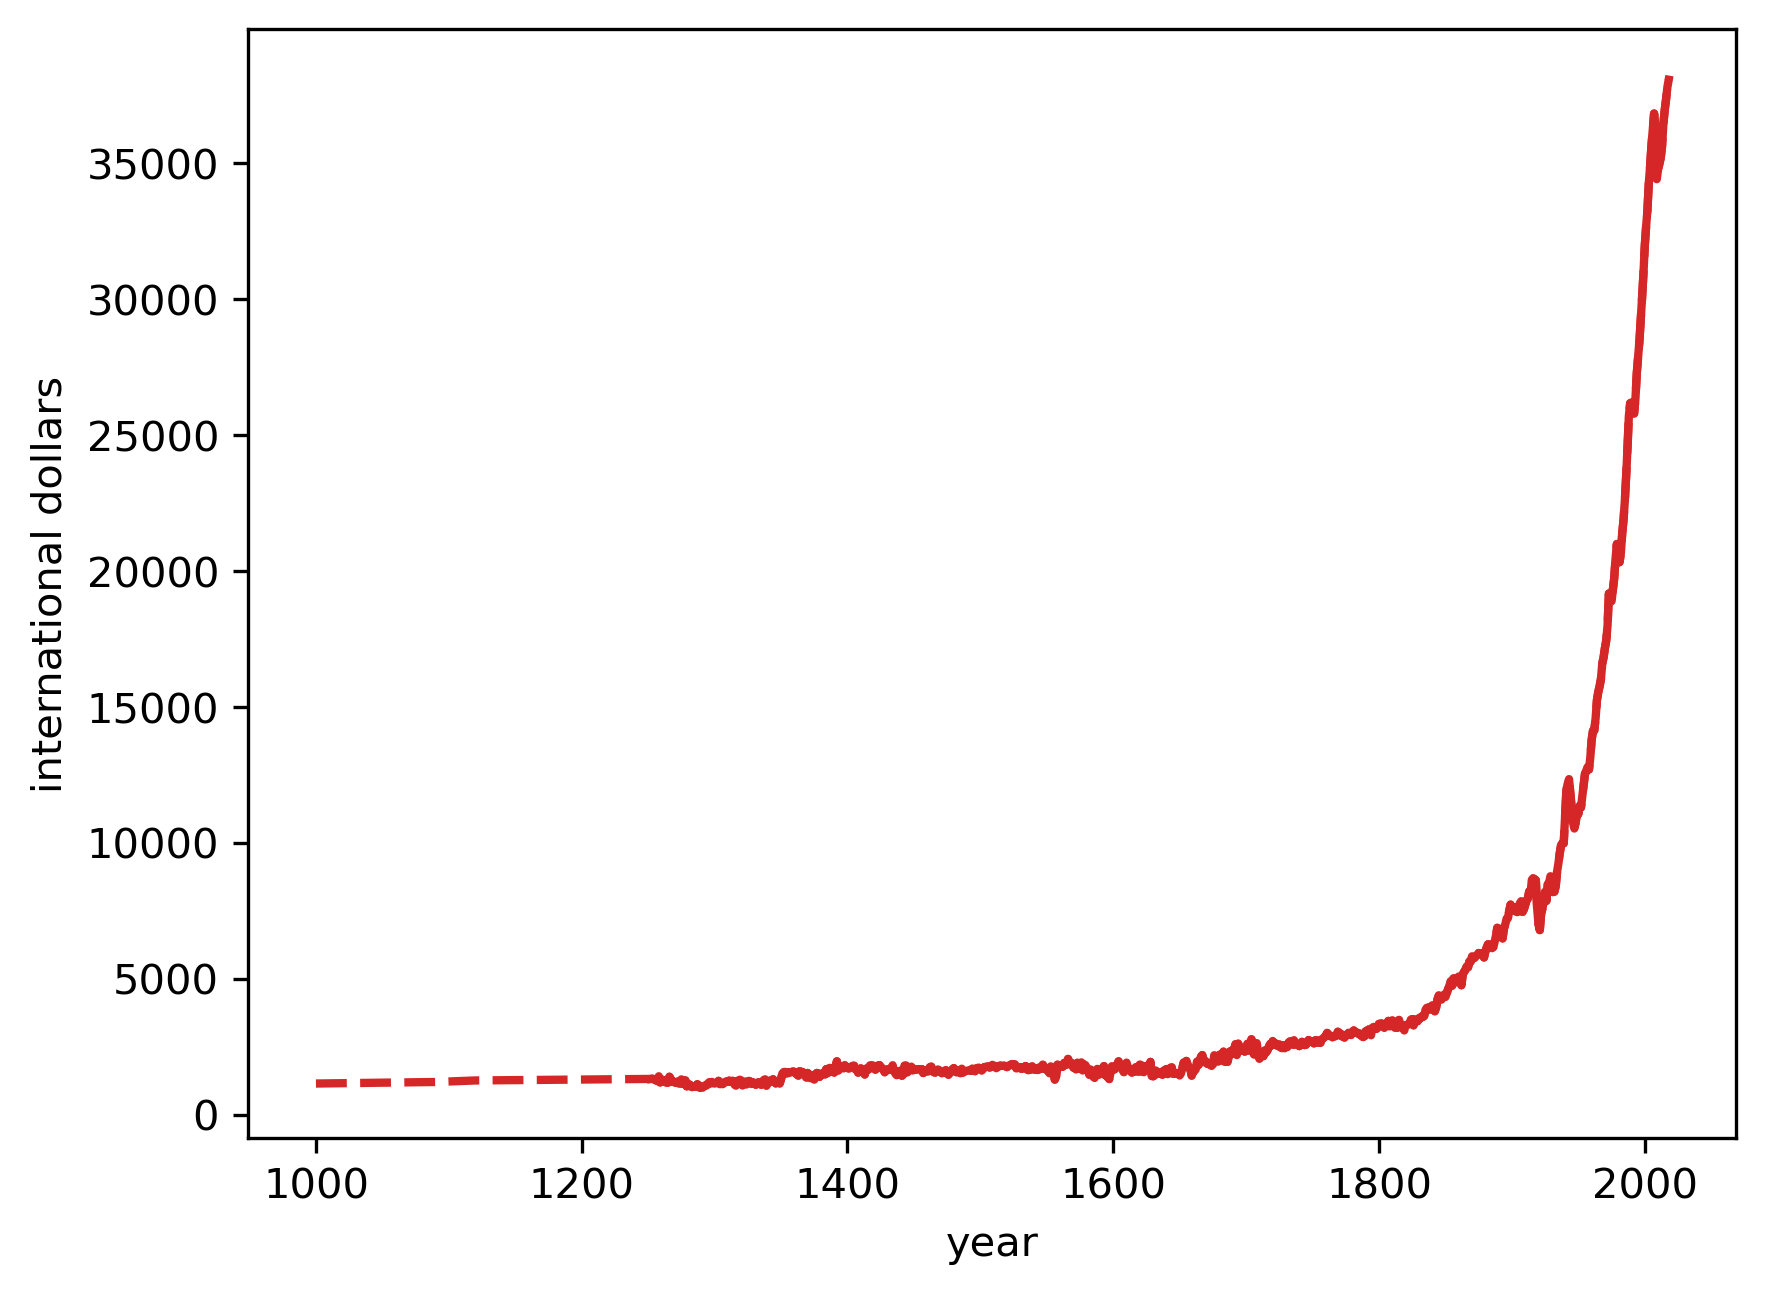

In [11]:
fig, ax = plt.subplots(dpi=300)
country = 'GBR'
ax.plot(gdp_pc[country].interpolate(),
        linestyle='--',
        lw=2,
        color=color_mapping[country])

ax.plot(gdp_pc[country],
        lw=2,
        color=color_mapping[country])
ax.set_ylabel('international dollars')
ax.set_xlabel('year')
plt.show()

### 美国、英国和中国的比较

在本节中，我们将比较美国、英国和中国的GDP增长。

第一步，我们创建一个函数，为一组国家生成绘图

In [12]:
def draw_interp_plots(series,        # pandas 数据
                      country,       # 国家代码列表
                      ylabel,        # y 轴标签
                      xlabel,        # x 轴标签
                      color_mapping, # 代码-颜色映射
                      code_to_name,  # 代码-国家名映射
                      lw,            # 线宽
                      logscale,      # Y 轴是否要对数刻度
                      ax             # matplolib 轴
                     ):

    for c in country:
        # 获取插值数据
        df_interpolated = series[c].interpolate(limit_area='inside')
        interpolated_data = df_interpolated[series[c].isnull()]

        # 用虚线绘制插值数据
        ax.plot(interpolated_data,
                linestyle='--',
                lw=lw,
                alpha=0.7,
                color=color_mapping[c])

        # 用实线绘制非插值数据
        ax.plot(series[c],
                lw=lw,
                color=color_mapping[c],
                alpha=0.8,
                label=code_to_name.loc[c]['country'])

        if logscale:
            ax.set_yscale('log')

    # 将图例绘制在图外
    ax.legend(loc='upper left', frameon=False)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)

从图表中可以看出，经济增长从 18 世纪真正开始，并持续了两百年。

这与其他国家的增长轨迹相比如何？

让我们看看美国（USA）、英国（GBR）和中国（CHN）

/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 33322 (\N{CJK UNIFIED IDEOGRAPH-822A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 28023 (\N{CJK UNIFIED IDEOGRAPH-6D77}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27861 (\N{CJK UNIFIED IDEOGRAPH-6CD5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26696 (\N{CJK UNIFIED IDEOGRAPH-6848}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.

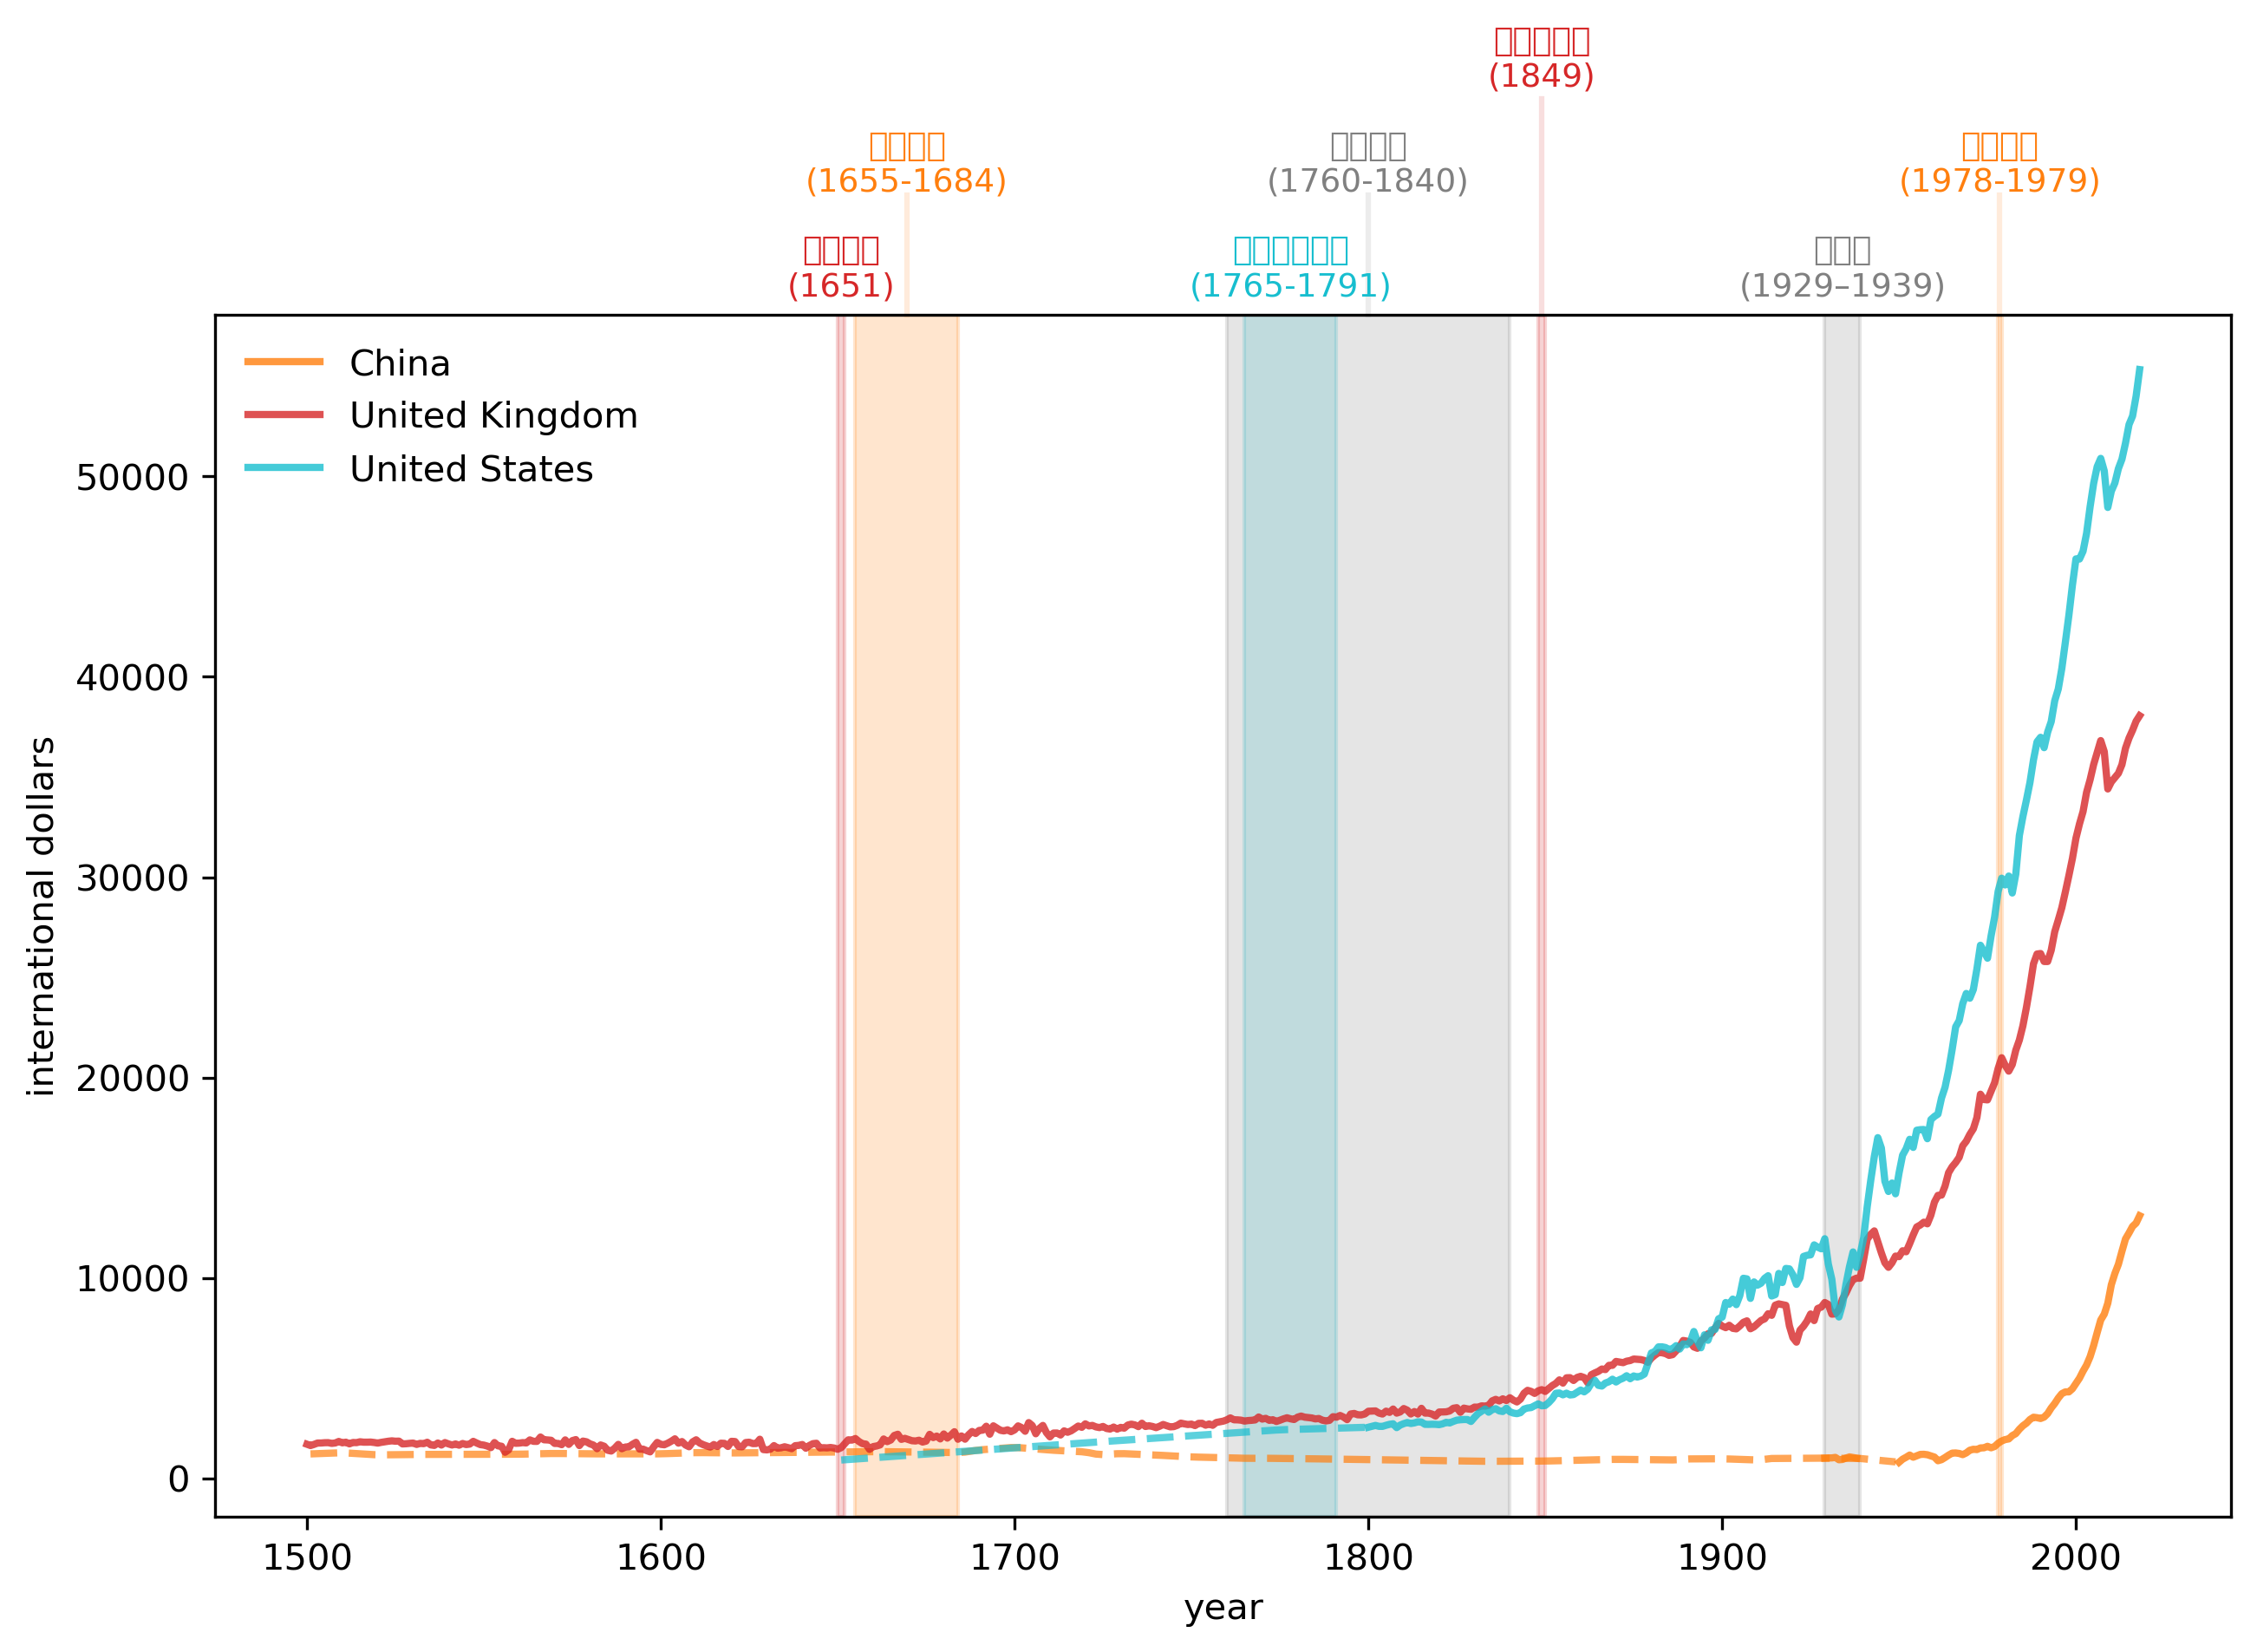

In [13]:
# 定义事件的namedtuple
Event = namedtuple('Event', ['year_range', 'y_text', 'text', 'color', 'ymax'])

fig, ax = plt.subplots(dpi=300, figsize=(10, 6))

country = ['CHN', 'GBR', 'USA']
draw_interp_plots(gdp_pc[country].loc[1500:], 
                  country,
                  'international dollars','year',
                  color_mapping, code_to_name, 2, False, ax)

# 定义事件和文本的参数
ylim = ax.get_ylim()[1]
b_params = {'color':'grey', 'alpha': 0.2}
t_params = {'fontsize': 9, 
            'va':'center', 'ha':'center'}

# 创建要注释的事件列表
events = [
    Event((1650, 1652), ylim + ylim*0.04, 
          '航海法案\n(1651)',
          color_mapping['GBR'], 1),
    Event((1655, 1684), ylim + ylim*0.13, 
          '闭关锁国\n(1655-1684)', 
          color_mapping['CHN'], 1.1),
    Event((1848, 1850), ylim + ylim*0.22,
          '废除航海法\n(1849)', 
          color_mapping['GBR'], 1.18),
    Event((1765, 1791), ylim + ylim*0.04, 
          '美国独立战争\n(1765-1791)', 
          color_mapping['USA'], 1),
    Event((1760, 1840), ylim + ylim*0.13, 
          '工业革命\n(1760-1840)', 
          'grey', 1.1),
    Event((1929, 1939), ylim + ylim*0.04, 
          '大萧条\n(1929–1939)', 
          'grey', 1),
    Event((1978, 1979), ylim + ylim*0.13, 
          '改革开放\n(1978-1979)', 
          color_mapping['CHN'], 1.1)
]

def draw_events(events, ax):
    # 遍历事件并添加注释和竖线
    for event in events:
        event_mid = sum(event.year_range)/2
        ax.text(event_mid, 
                event.y_text, event.text, 
                color=event.color, **t_params)
        ax.axvspan(*event.year_range, color=event.color, alpha=0.2)
        ax.axvline(event_mid, ymin=1, ymax=event.ymax, color=event.color,
                   clip_on=False, alpha=0.15)
draw_events(events, ax)
plt.show()

上图展示了工业革命的传播如何随着时间的推移逐渐提高了大量人群的生活水平

- 大部分增长发生在工业革命之后的过去150年间。
- 从1820年到1940年，美国和英国的人均GDP上升并与中国拉开差距。
- 1950年后，尤其是1970年代末后，差距迅速缩小。
- 这些结果反映了技术和经济政策因素的复杂组合，经济增长的研究者们试图理解并量化这些因素。

### 聚焦于中国

下图所展示的中国从1500年到1970年的人均GDP水平非常有趣。

我们可以看到，从1700年到20世纪初，中国的人均GDP经历了长期的下降。

因此，图表显示了

- 清政府闭关锁国政策后的长期经济下行和停滞。
- 英国工业革命开始后，中国的经历与英国截然不同。
- 自强运动似乎主要帮助了中国的增长。
- 现代中国经济政策的惊人增长成果，最终在1970年代末进行的改革和开放政策中达到高潮。

/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38469 (\N{CJK UNIFIED IDEOGRAPH-9645}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.

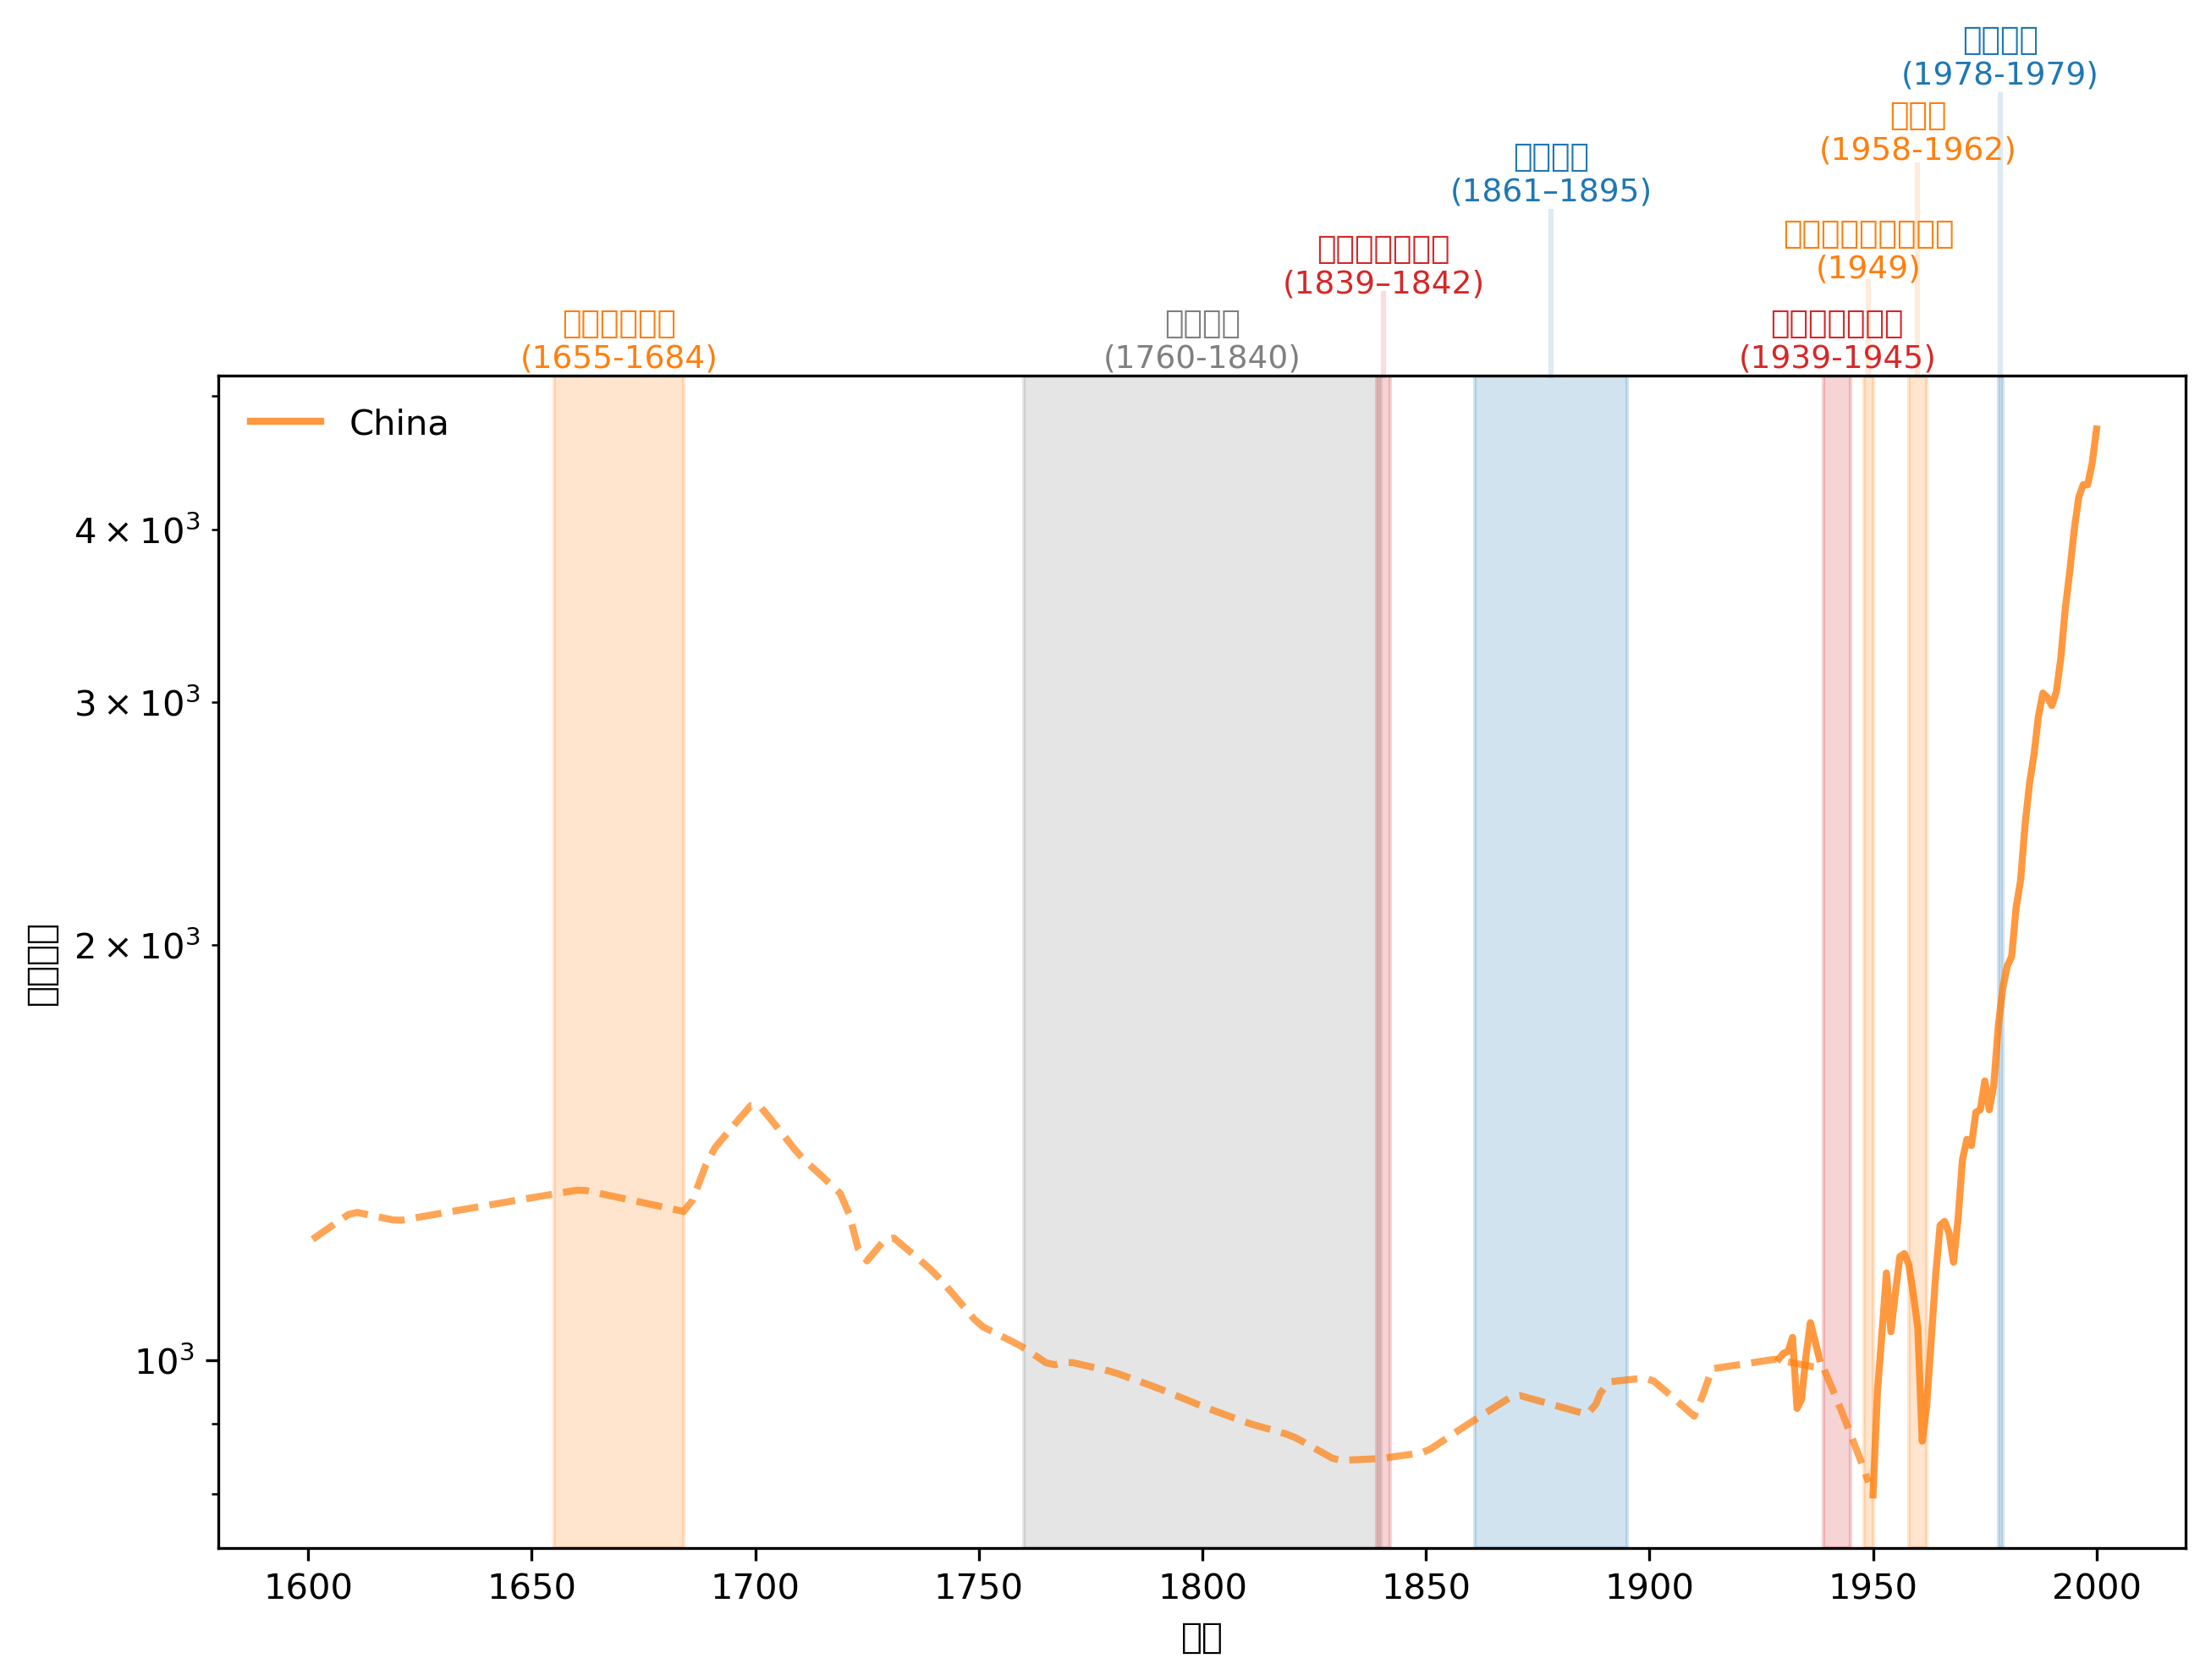

In [14]:
fig, ax = plt.subplots(dpi=300, figsize=(10, 6))

country = ['CHN']
draw_interp_plots(gdp_pc[country].loc[1600:2000], 
                  country,
                  '国际美元','年份',
                  color_mapping, code_to_name, 2, True, ax)

ylim = ax.get_ylim()[1]

events = [
Event((1655, 1684), ylim + ylim*0.06, 
      '闭关锁国政策\n(1655-1684)', 
      'tab:orange', 1),
Event((1760, 1840), ylim + ylim*0.06, 
      '工业革命\n(1760-1840)', 
      'grey', 1),
Event((1839, 1842), ylim + ylim*0.2, 
      '第一次鸦片战争\n(1839–1842)', 
      'tab:red', 1.07),
Event((1861, 1895), ylim + ylim*0.4, 
      '自强运动\n(1861–1895)', 
      'tab:blue', 1.14),
Event((1939, 1945), ylim + ylim*0.06, 
      '第二次世界大战\n(1939-1945)', 
      'tab:red', 1),
Event((1948, 1950), ylim + ylim*0.23, 
      '中华人民共和国成立\n(1949)', 
      color_mapping['CHN'], 1.08),
Event((1958, 1962), ylim + ylim*0.5, 
      '大跃进\n(1958-1962)', 
      'tab:orange', 1.18),
Event((1978, 1979), ylim + ylim*0.7, 
      '改革开放\n(1978-1979)', 
      'tab:blue', 1.24)
]

# 绘制事件
draw_events(events, ax)
plt.show()

### 聚焦于美国和英国

现在我们更详细地研究美国（USA）和英国（GBR）。

在以下图表中，请注意
- 贸易政策（航海法案）的影响。
- 工业革命带来的生产力变化。
- 美国逐渐接近并超过英国，为“美国世纪”奠定基础。
- 战争的意外后果。
- [经济周期](business_cycle)衰退和萧条带来的中断和伤痕。

/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38469 (\N{CJK UNIFIED IDEOGRAPH-9645}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.

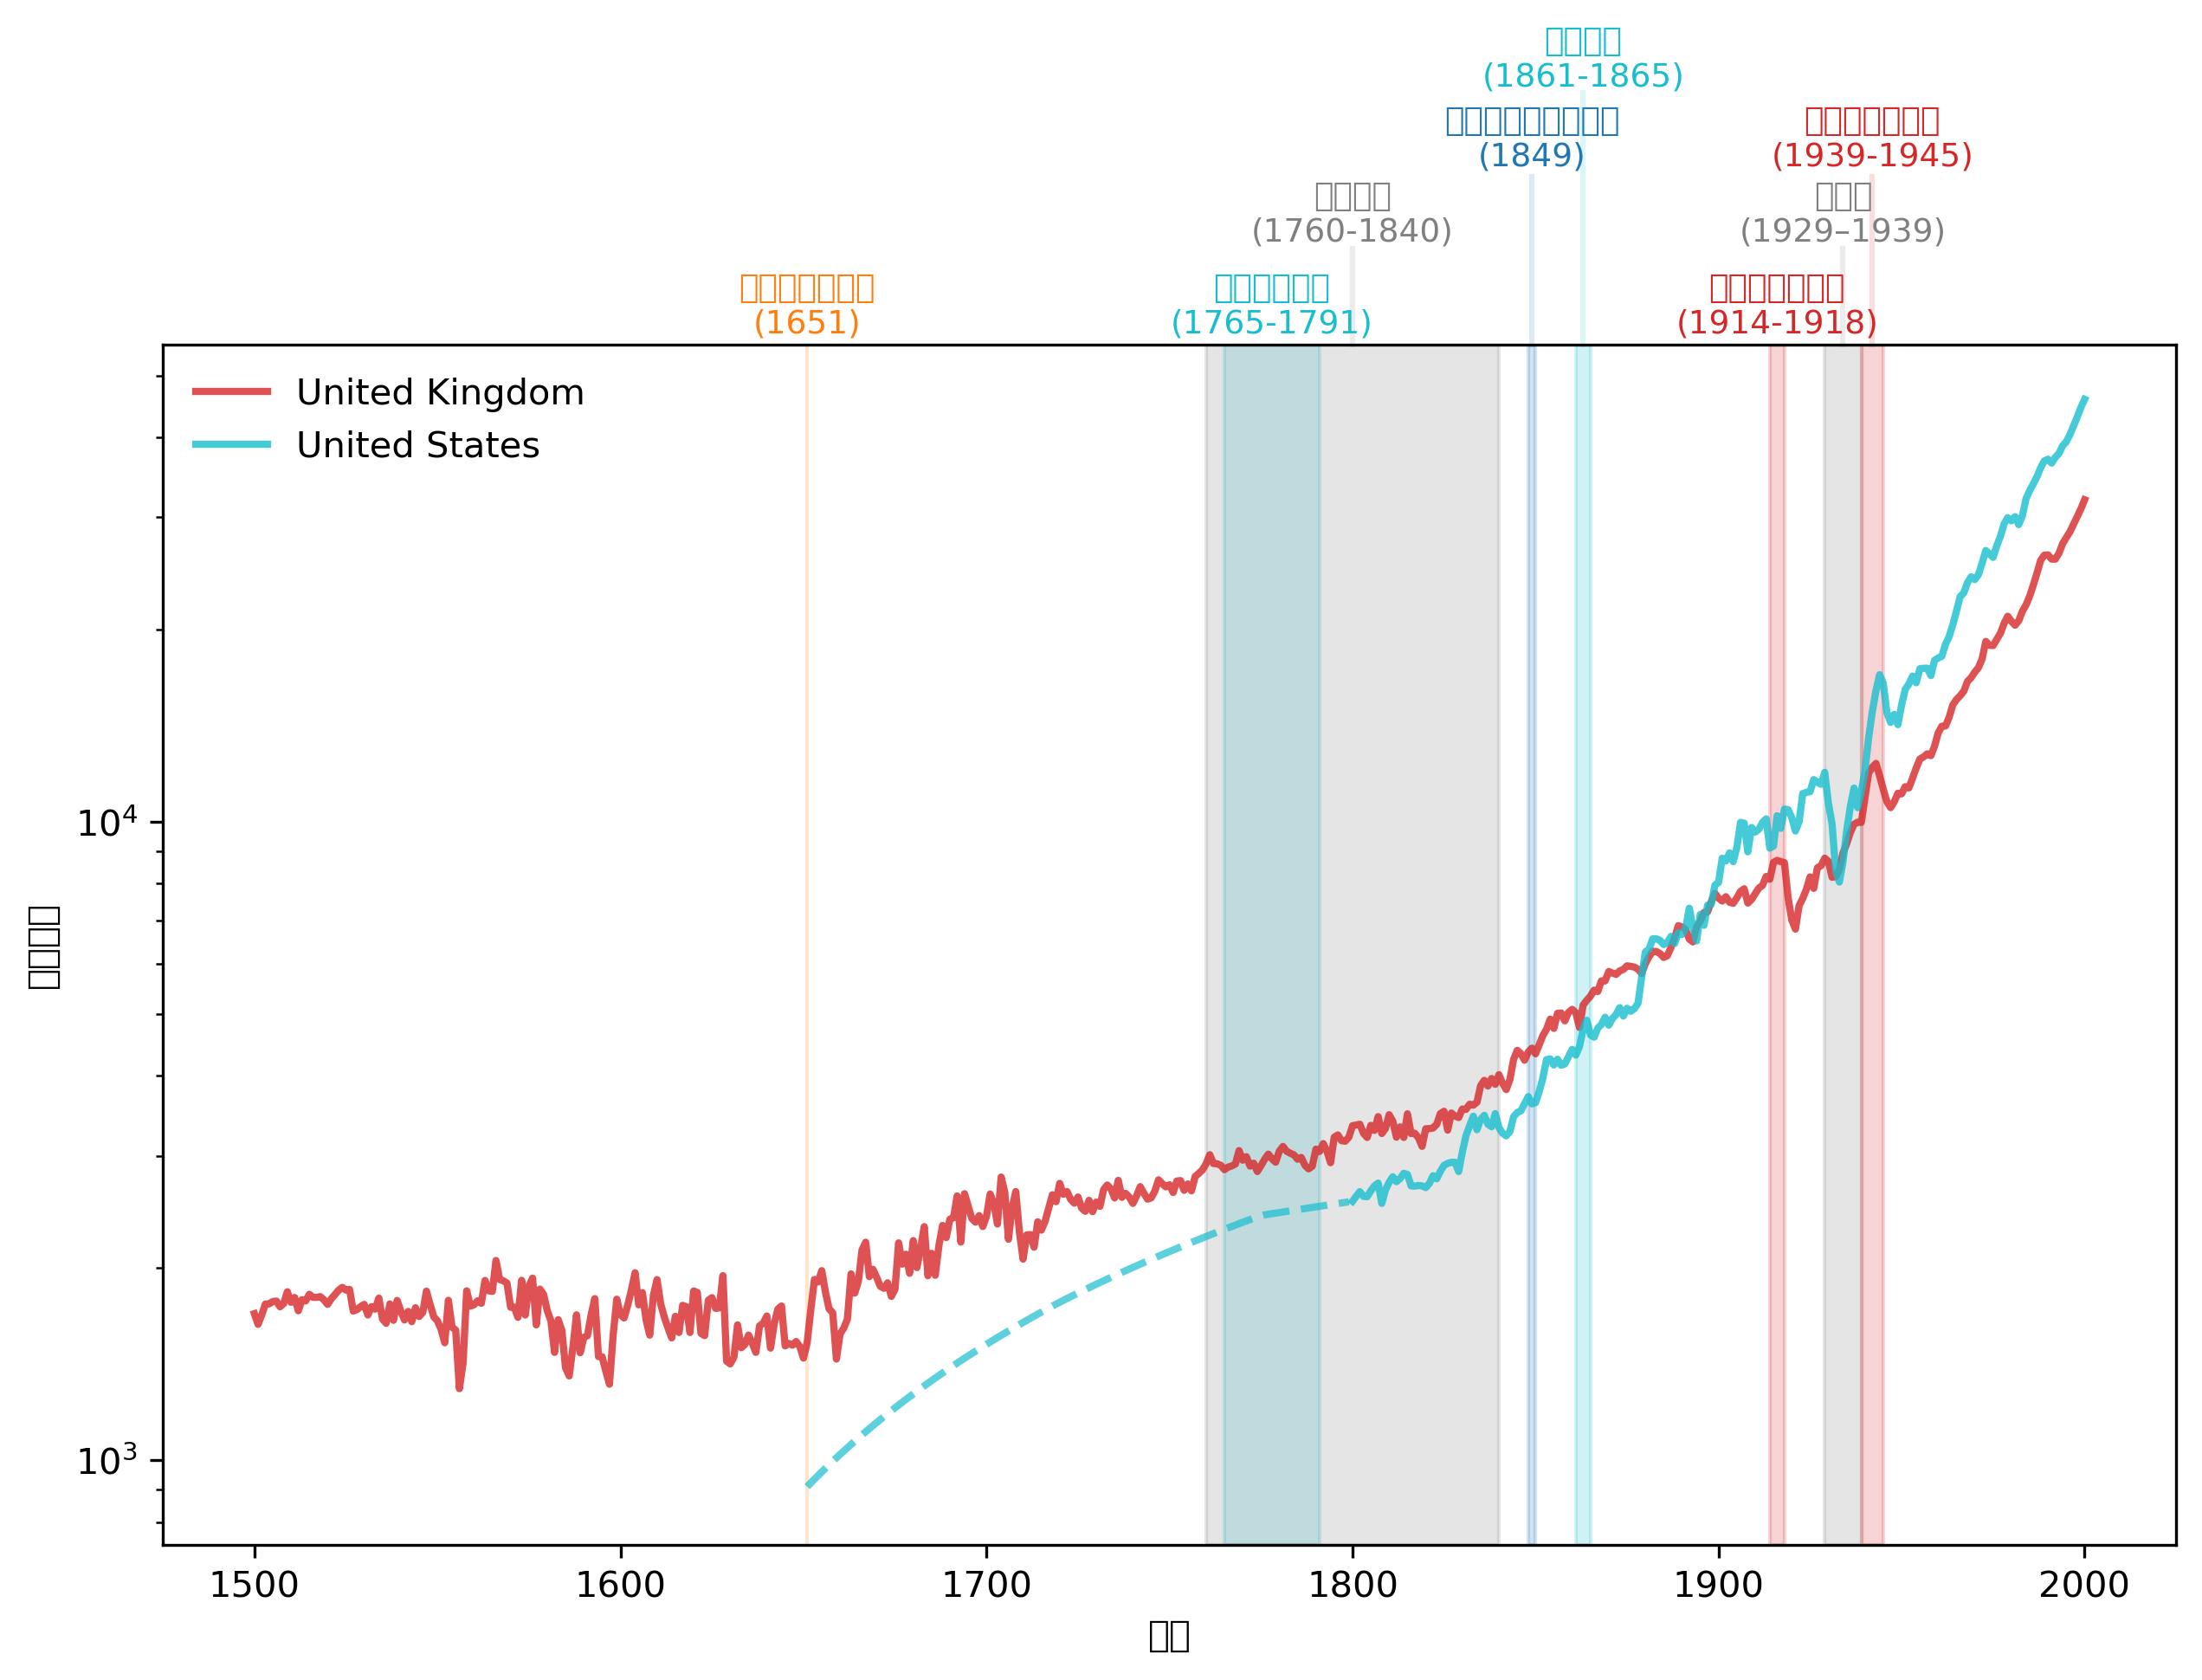

In [15]:
fig, ax = plt.subplots(dpi=300, figsize=(10, 6))

country = ['GBR', 'USA']
draw_interp_plots(gdp_pc[country].loc[1500:2000],
                  country,
                  '国际美元','年份',
                  color_mapping, code_to_name, 2, True, ax)

ylim = ax.get_ylim()[1]

# 创建数据点列表
events = [
    Event((1651, 1651), ylim + ylim*0.15, 
          '航海法（英国）\n(1651)', 
          'tab:orange', 1),
    Event((1765, 1791), ylim + ylim*0.15, 
          '美国独立战争\n(1765-1791)',
          color_mapping['USA'], 1),
    Event((1760, 1840), ylim + ylim*0.6, 
          '工业革命\n(1760-1840)', 
          'grey', 1.08),
    Event((1848, 1850), ylim + ylim*1.1, 
          '废除航海法（英国）\n(1849)', 
          'tab:blue', 1.14),
    Event((1861, 1865), ylim + ylim*1.8, 
          '美国内战\n(1861-1865)', 
          color_mapping['USA'], 1.21),
    Event((1914, 1918), ylim + ylim*0.15, 
          '第一次世界大战\n(1914-1918)', 
          'tab:red', 1),
    Event((1929, 1939), ylim + ylim*0.6, 
          '大萧条\n(1929–1939)', 
          'grey', 1.08),
    Event((1939, 1945), ylim + ylim*1.1, 
          '第二次世界大战\n(1939-1945)', 
          'tab:red', 1.14)
]

# 绘制事件
draw_events(events, ax)
plt.show()

## GDP增长

现在我们将构建一些对地缘政治历史学家如亚当·图兹感兴趣的图表。

我们将关注总国内生产总值（GDP）（作为“国家地缘政治-军事力量”的代理变量），而不是人均GDP（作为生活水平的代理变量）。

In [16]:
data = pd.read_excel(data_url, sheet_name='Full data')
data.set_index(['countrycode', 'year'], inplace=True)
data['gdp'] = data['gdppc'] * data['pop']
gdp = data['gdp'].unstack('countrycode')

### 早期工业化（1820至1940年）

我们首先可视化中国、俄国/前苏联、日本、英国和美国的趋势。

最显著的趋势是美国的崛起，在1860年代超过英国，并在1880年代超过中国。

这种增长持续到1930年代的大萧条到来时出现大幅下降。

与此同时，俄国在第一次世界大战期间经历了重大挫折，并在二月革命后显著恢复。

/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  func(*args, **kwargs)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from current font.
  func(*args, **kwargs)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from current font.
  func(*args, **kwargs)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 38469 (\N{CJK UNIFIED IDEOGRAPH-9645}) missing from current font.
  func(*args, **kwargs)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 32654 (\N{CJK UNIFIED IDEOGRAPH-7F8E}) missing from current font.
  fu

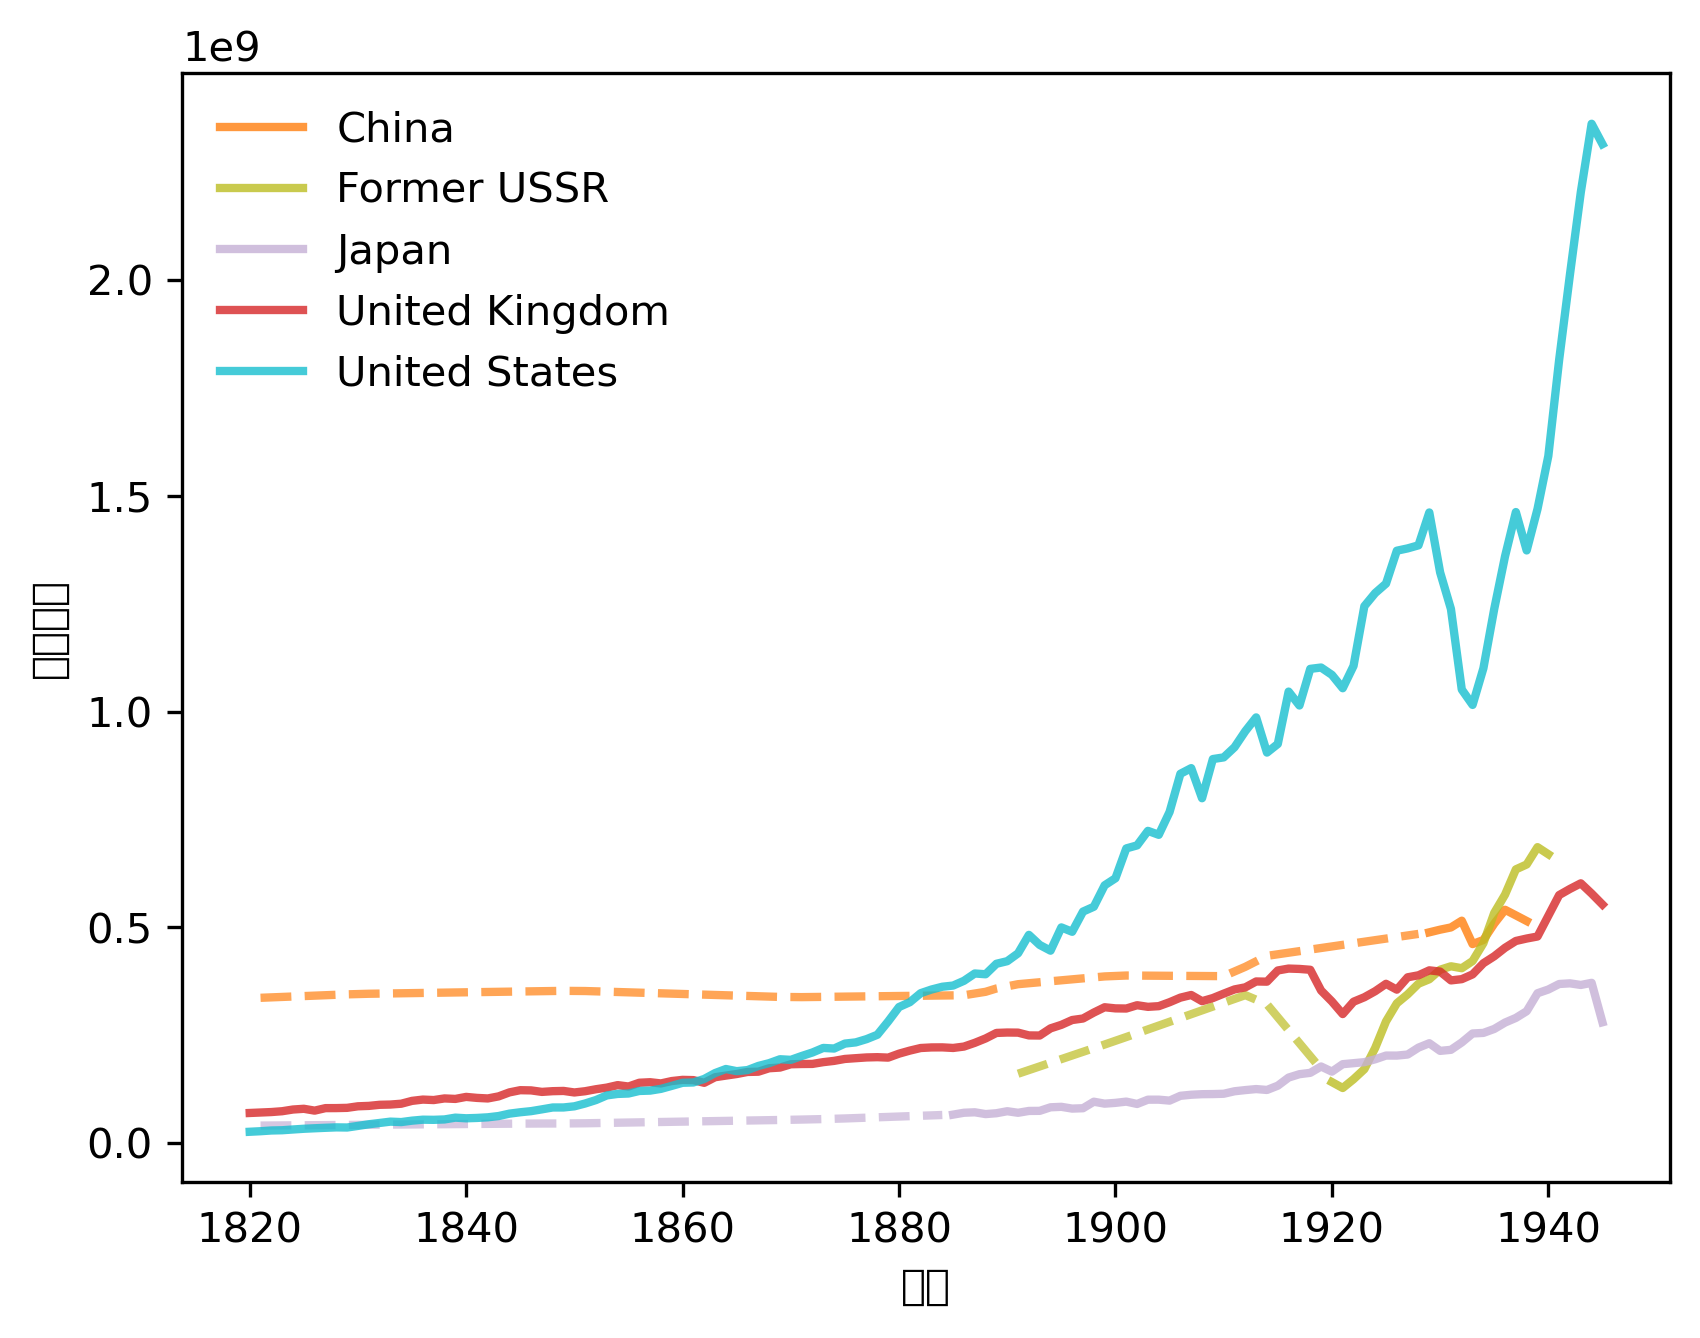

In [17]:
fig, ax = plt.subplots(dpi=300)
country = ['CHN', 'SUN', 'JPN', 'GBR', 'USA']
start_year, end_year = (1820, 1945)
draw_interp_plots(gdp[country].loc[start_year:end_year], 
                  country,
                  '国际美元', '年份',
                  color_mapping, code_to_name, 2, False, ax)

#### 构建类似于图兹的图

在本节中，我们将介绍如何构建本讲座开始时讨论过的{cite}`Tooze_2014`第1章中引人注目的图表。

首先，让我们定义一个由大英帝国（BEM）组成的国家集合，这样我们就可以用Tooze的数据中复制绘制这幅图

In [18]:
BEM = ['GBR', 'IND', 'AUS', 'NZL', 'CAN', 'ZAF']
# 插值不完全时间序列
gdp['BEM'] = gdp[BEM].loc[start_year-1:end_year].interpolate(method='index').sum(axis=1)

现在，让我们组装这些数据序列

In [19]:
color_mapping['BEM'] = color_mapping['GBR']  
bem = pd.DataFrame(["British Empire"], index=["BEM"], columns=['country'])
bem.index.name = 'countrycode'
code_to_name = pd.concat([code_to_name, bem])

并绘制他们

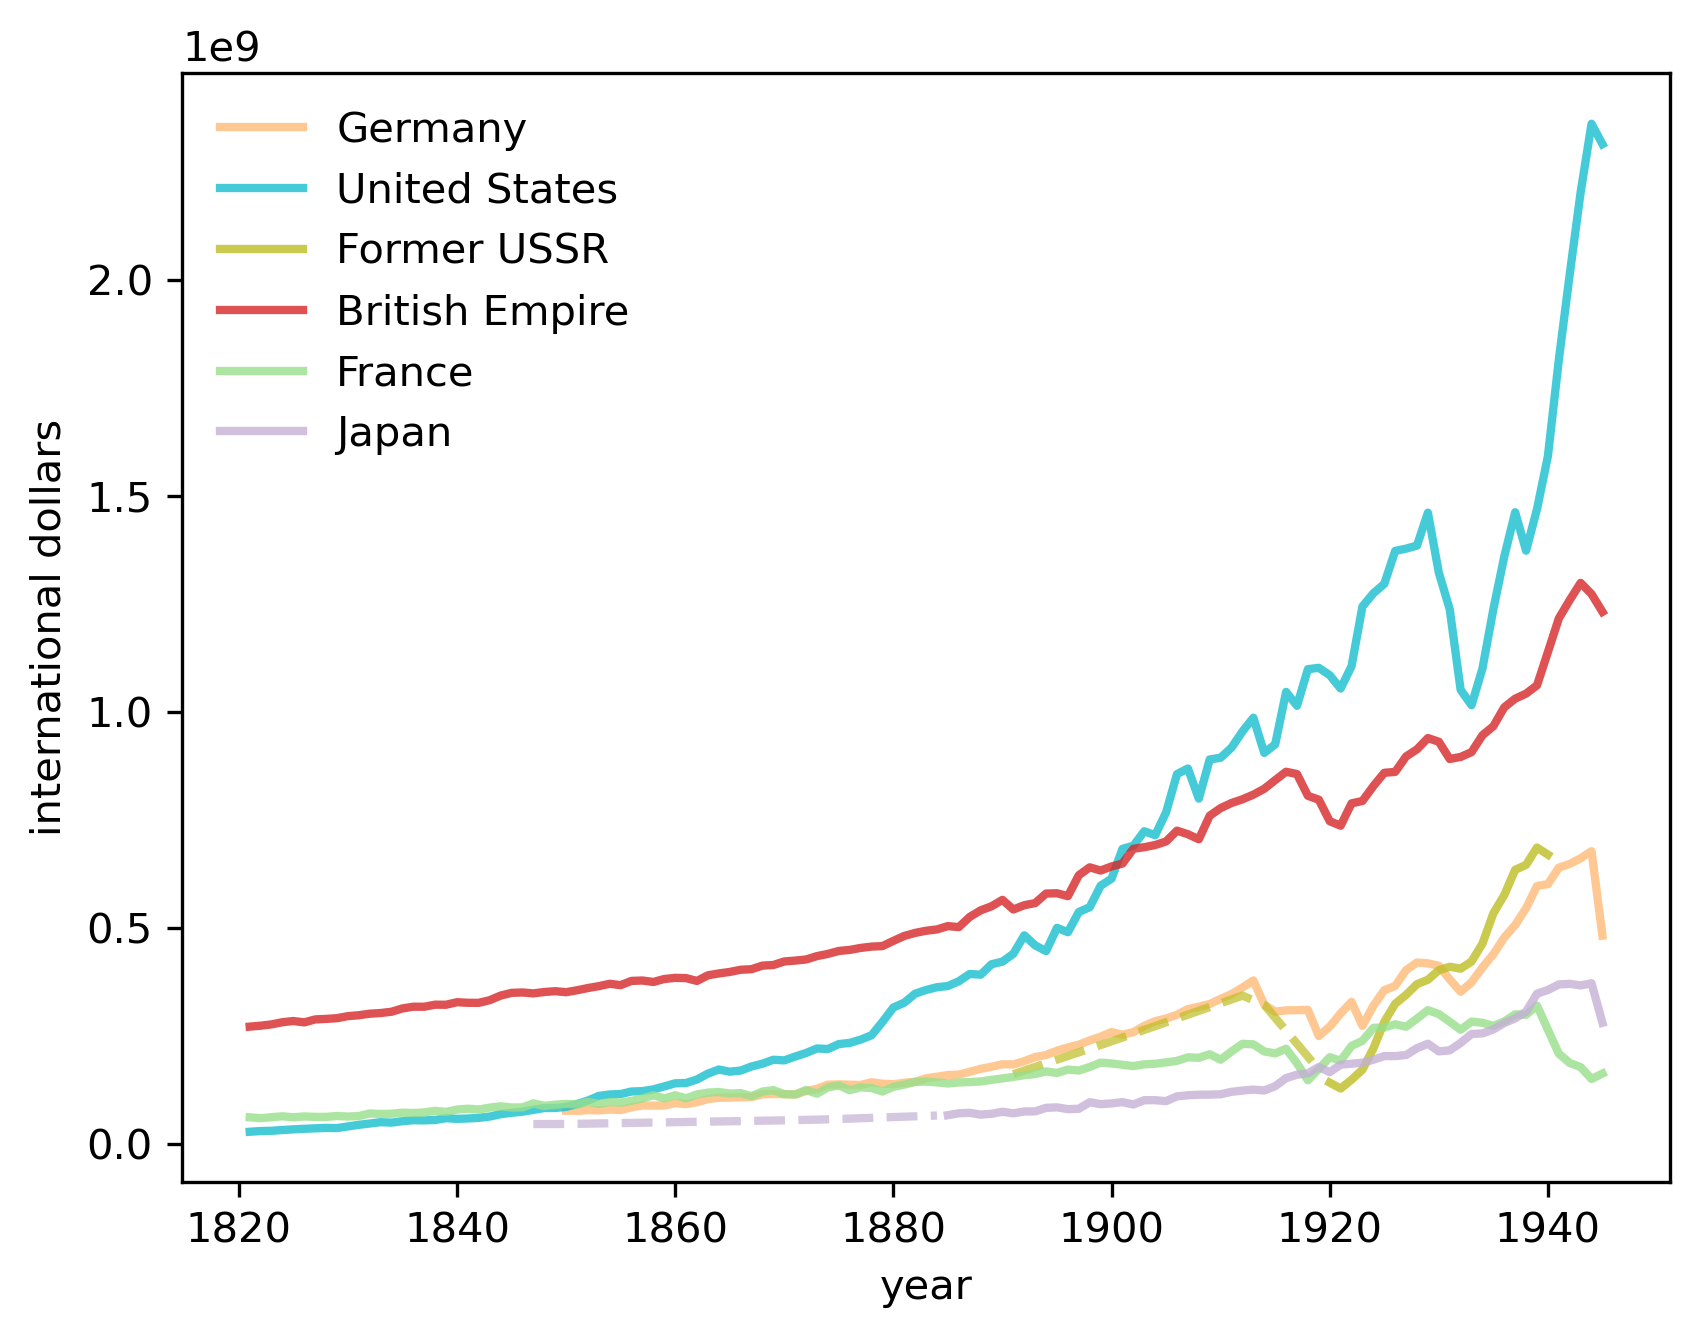

In [20]:
fig, ax = plt.subplots(dpi=300)
country = ['DEU', 'USA', 'SUN', 'BEM', 'FRA', 'JPN']
start_year, end_year = (1821, 1945)
draw_interp_plots(gdp[country].loc[start_year:end_year], 
                  country,
                  'international dollars', 'year',
                  color_mapping, code_to_name, 2, False, ax)

plt.savefig("./_static/lecture_specific/long_run_growth/tooze_ch1_graph.png", dpi=300,
            bbox_inches='tight')
plt.show()

在本讲座的开头，我们提到了美国的 GDP 是如何在 19 世纪初 “从无到有”，到 19 世纪末与大英帝国的 GDP 相媲美，进而超越大英帝国的 GDP，为 “美国的二十世纪”奠定了地缘政治的基础。

让我们将时间向前推移，大致从第二次世界大战后图示停止的地方开始。

按照图兹第一章的分析，这样做可以提供一些有关当今地缘政治现实的信息。

### 现代时代（1950至2020年）

下图显示了中国自二十世纪七十年代后期以来增长的迅速。

/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  func(*args, **kwargs)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from current font.
  func(*args, **kwargs)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from current font.
  func(*args, **kwargs)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 38469 (\N{CJK UNIFIED IDEOGRAPH-9645}) missing from current font.
  func(*args, **kwargs)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 32654 (\N{CJK UNIFIED IDEOGRAPH-7F8E}) missing from current font.
  fu

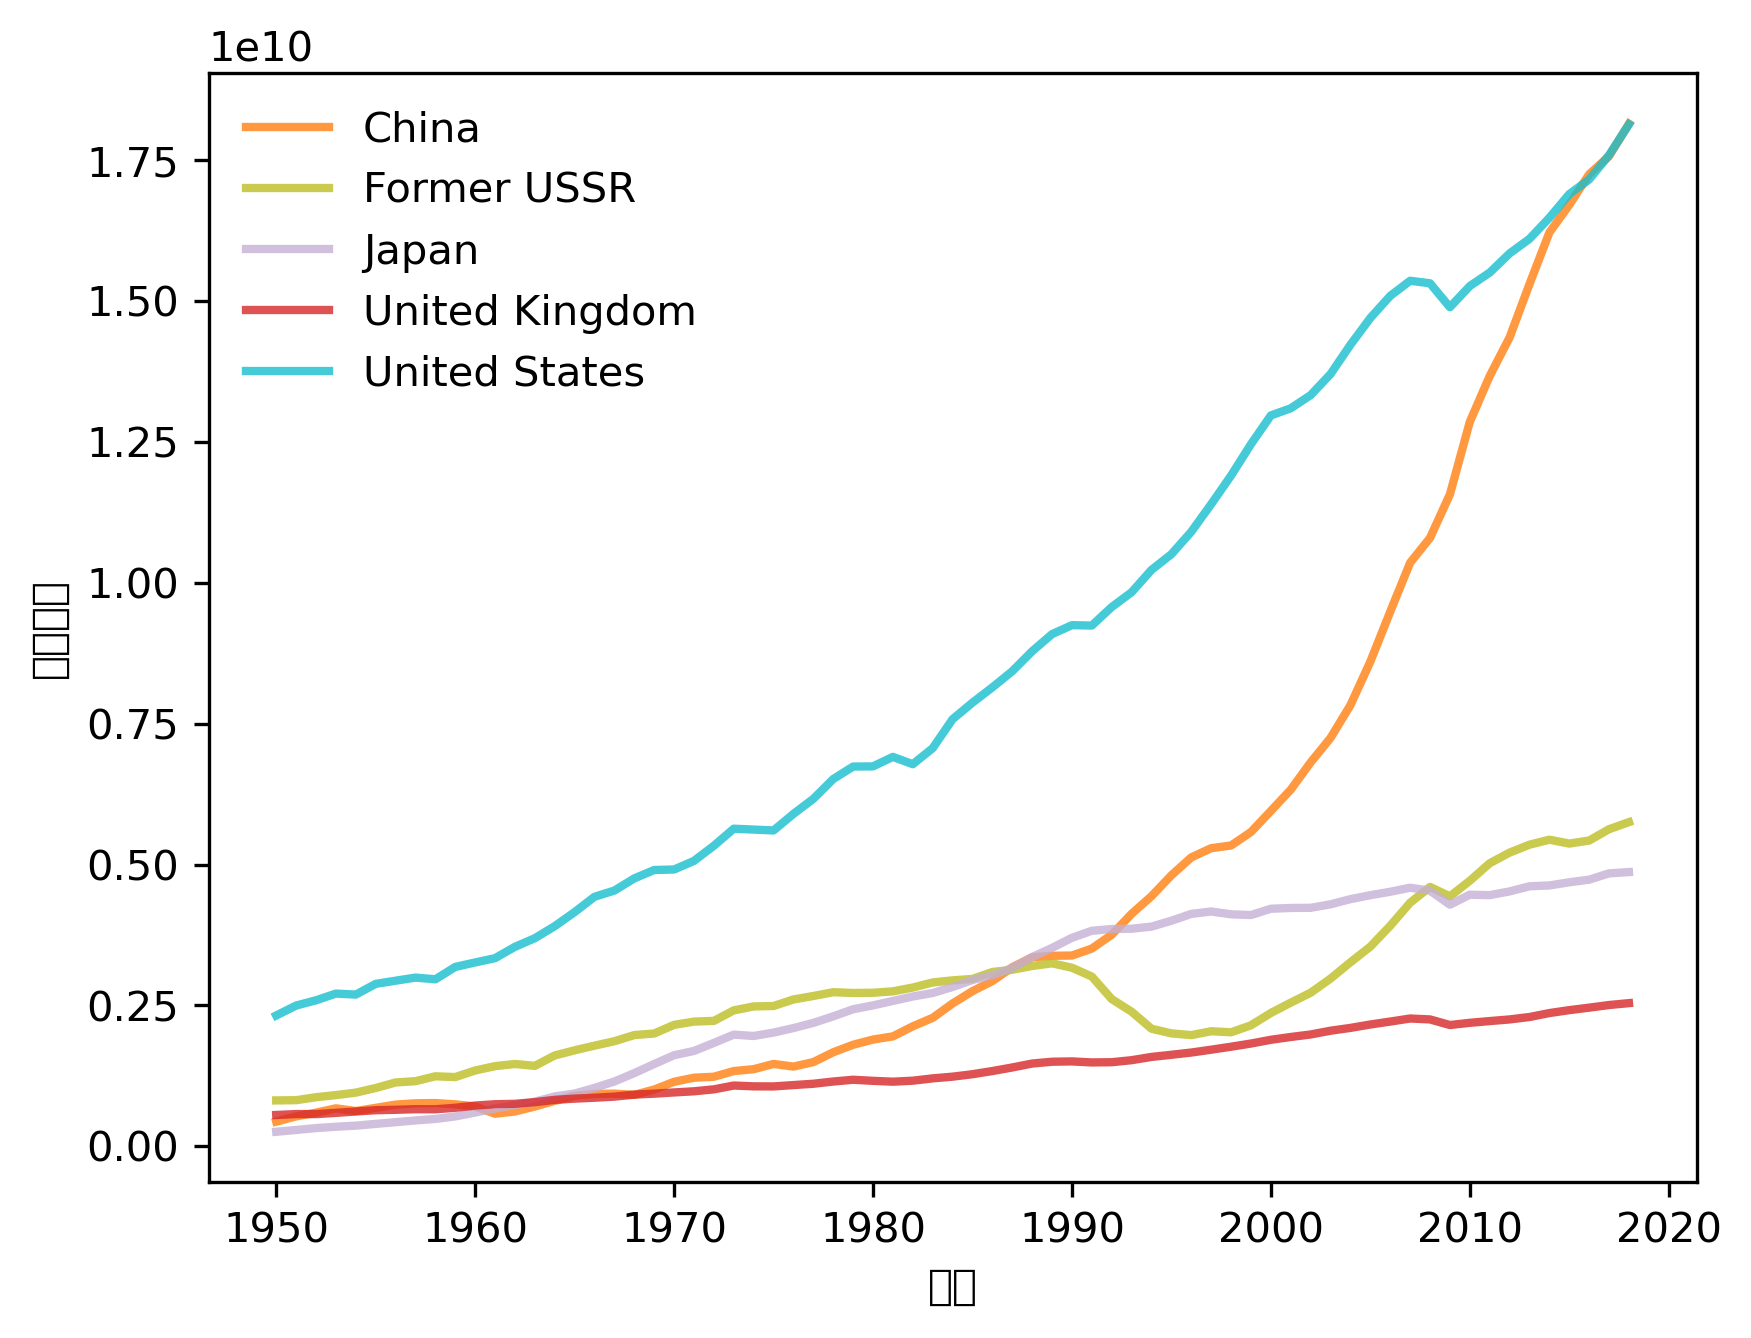

In [21]:
fig, ax = plt.subplots(dpi=300)
country = ['CHN', 'SUN', 'JPN', 'GBR', 'USA']
start_year, end_year = (1950, 2020)
draw_interp_plots(gdp[country].loc[start_year:end_year], 
                  country,
                  '国际美元', '年份',
                  color_mapping, code_to_name, 2, False, ax)

很自然的我们会将这个图表与图{numref}`gdp1`相比较，后者显示了美国在“美国世纪”开始时超过英国的情况。

## 地区分析

我们经常要研究“世界大国”俱乐部之外的国家的历史。

[Maddison Historical Statistics](https://www.rug.nl/ggdc/historicaldevelopment/maddison/) 数据集还整合了地区汇总信息

In [22]:
data = pd.read_excel(data_url, 
                     sheet_name='Regional data', 
                     header=(0,1,2),
                     index_col=0)
data.columns = data.columns.droplevel(level=2)

我们可以将原始数据存储在更方便的格式中来构建地区人均GDP的单一表格

In [23]:
regionalgdp_pc = data['gdppc_2011'].copy()
regionalgdp_pc.index = pd.to_datetime(regionalgdp_pc.index, format='%Y')

我们基于时间进行插值来填补数据集中的任何缺口，以便于绘图

In [24]:
regionalgdp_pc.interpolate(method='time', inplace=True)

进行更深入的研究，我们将 西方分支（`Western Offshoots`）和 （撒哈拉以南非洲）`Sub-Saharan Africa`的时间序列与世界各地多个不同地区进行比较。

下图再次展示了工业革命之后西方与世界其他地区的差距，以及1950年之后的世界趋同

/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38469 (\N{CJK UNIFIED IDEOGRAPH-9645}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.

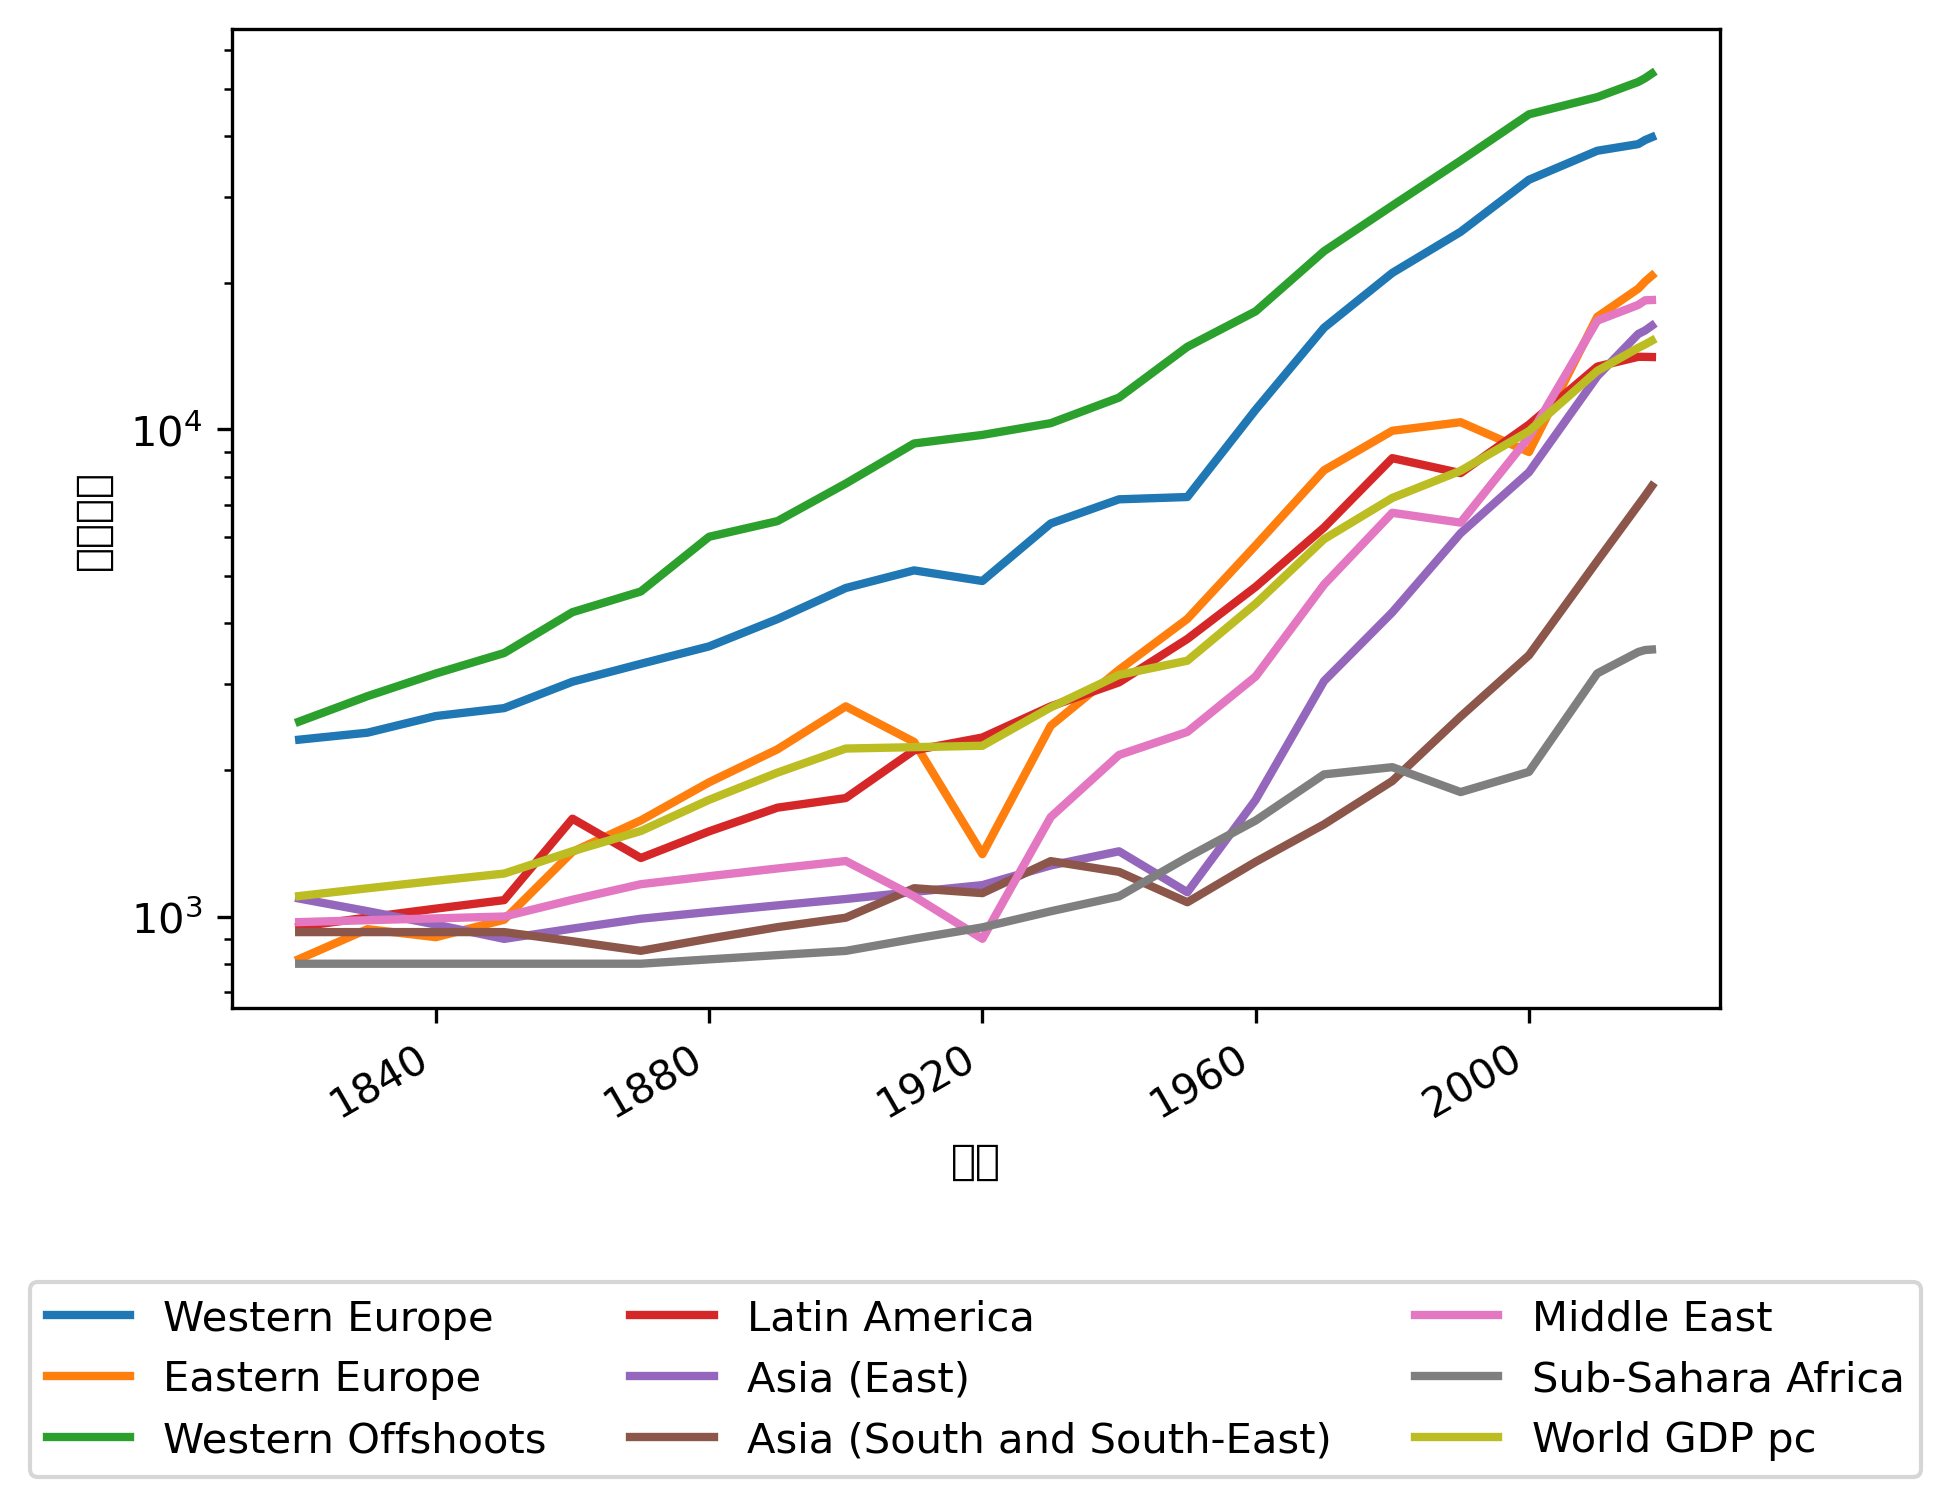

In [25]:
fig, ax = plt.subplots(dpi=300)
regionalgdp_pc.plot(ax=ax, xlabel='年份',
                    lw=2,
                    ylabel='国际美元')
ax.set_yscale('log')
plt.legend(loc='lower center',
           ncol=3, bbox_to_anchor=[0.5, -0.5])
plt.show()